In [1]:
import os
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import seaborn

In [2]:
os.chdir(r"C:\Users\arsha\Projects\Kaggle\House_Prices")
train_file_name = "data\\train.csv"
dfTrainData = pd.read_csv(train_file_name)

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

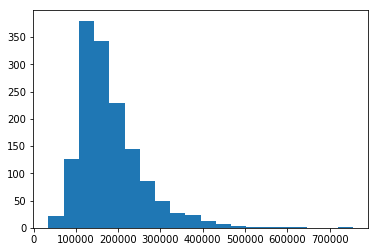

In [4]:
# building some histograms for EDA
plt.hist(dfTrainData.SalePrice, bins=20)

(array([  5.,   0.,   4.,   8.,   8.,  46.,  57., 127., 228., 242., 238.,
        162., 134.,  86.,  61.,  29.,  15.,   4.,   4.,   2.]),
 array([10.46024211, 10.61395365, 10.7676652 , 10.92137675, 11.07508829,
        11.22879984, 11.38251138, 11.53622293, 11.68993448, 11.84364602,
        11.99735757, 12.15106911, 12.30478066, 12.45849221, 12.61220375,
        12.7659153 , 12.91962684, 13.07333839, 13.22704994, 13.38076148,
        13.53447303]),
 <a list of 20 Patch objects>)

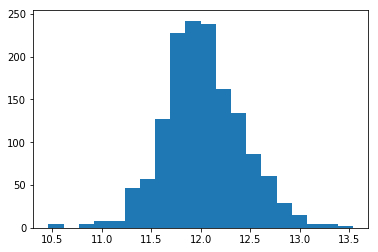

In [5]:
plt.hist(np.log(dfTrainData.SalePrice), bins=20)

In [6]:
dfTrainData.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

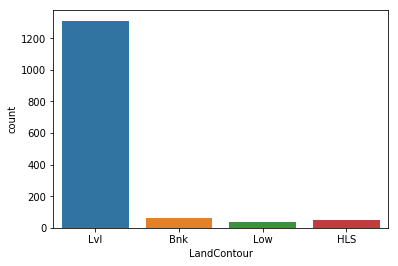

In [7]:
seaborn.countplot(dfTrainData.LandContour)

In [12]:
dfInfo = pd.DataFrame(dfTrainData.dtypes)

In [16]:
dfInfo.reset_index(inplace=True)

In [19]:
dfInfo.columns = ["column_name","column_type"]

In [26]:
# converting two pandas column to a dictionary
dictInfo = dict(zip(dfInfo.column_name, dfInfo.column_type))

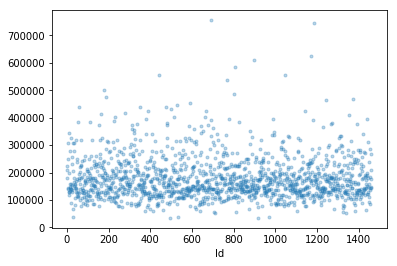

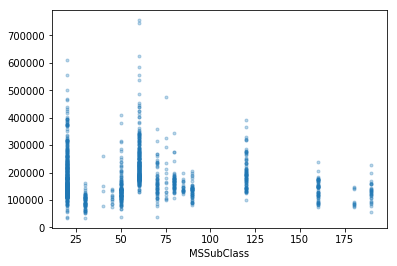

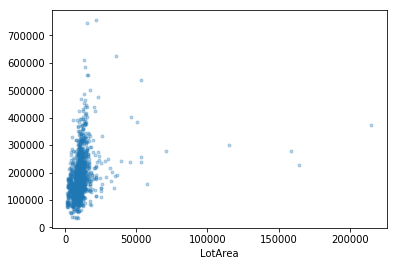

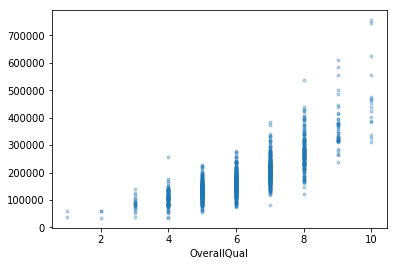

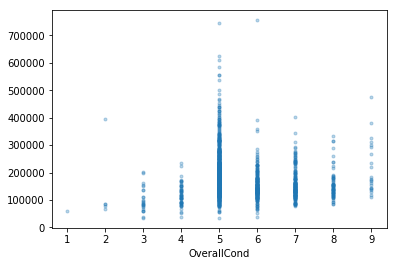

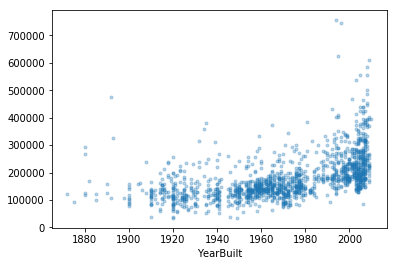

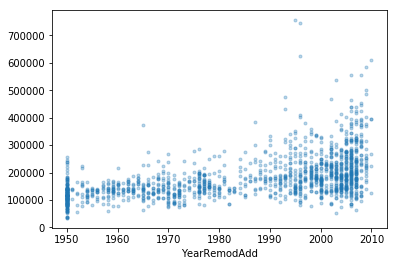

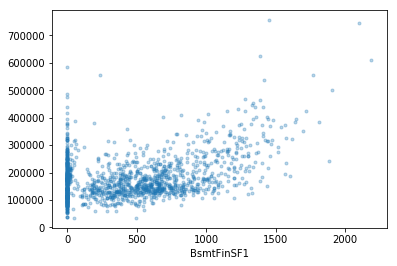

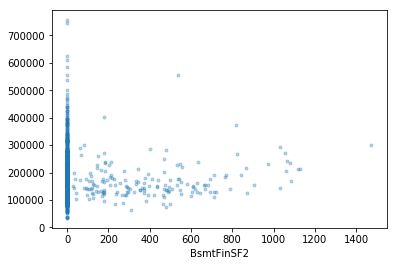

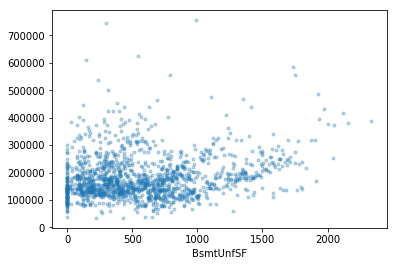

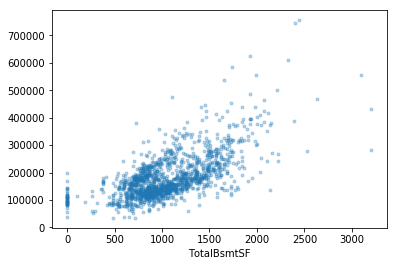

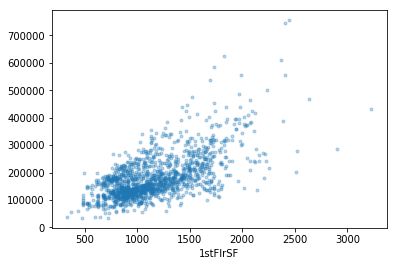

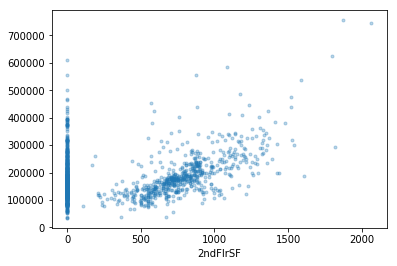

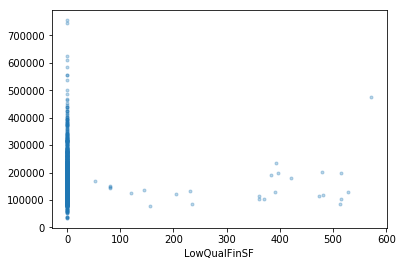

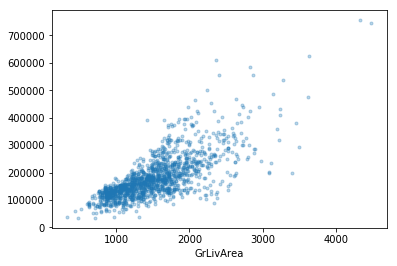

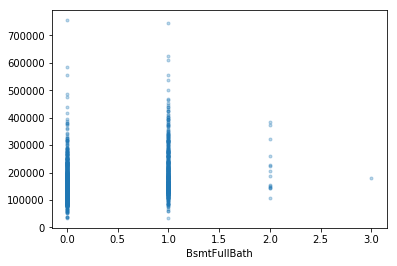

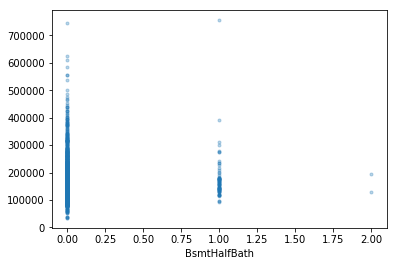

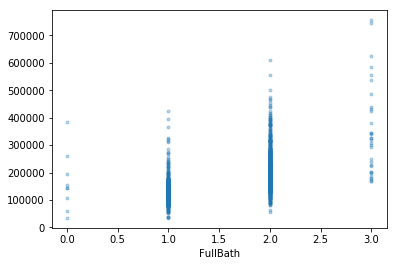

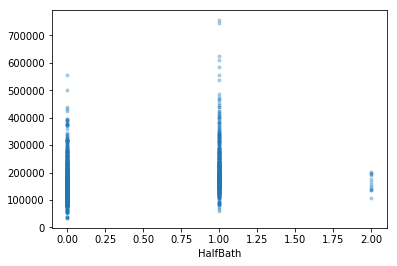

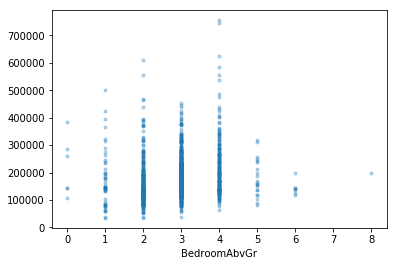

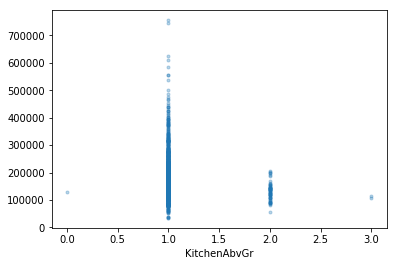

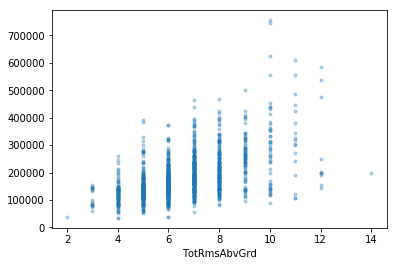

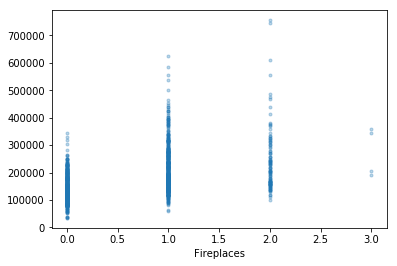

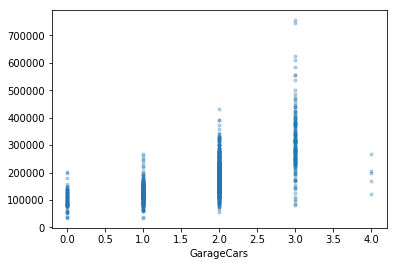

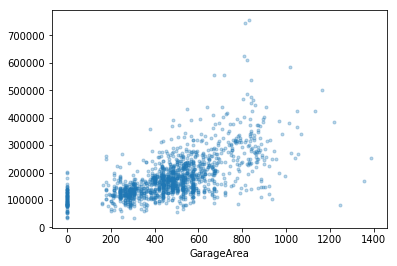

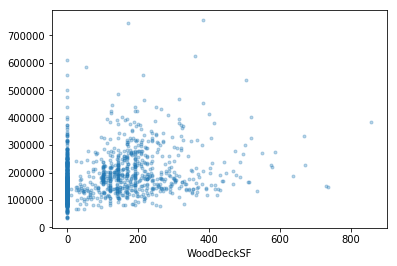

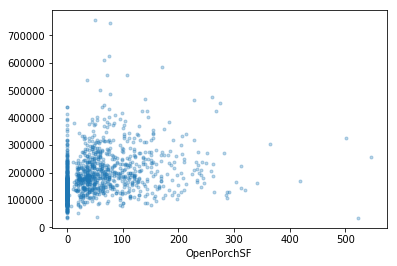

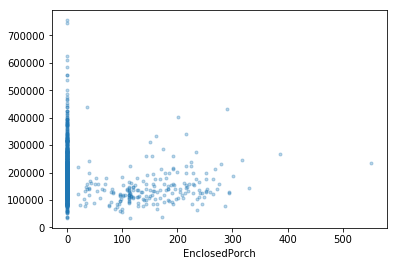

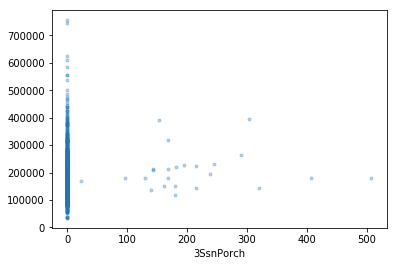

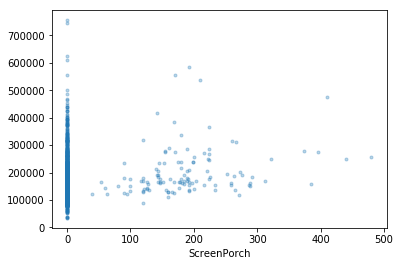

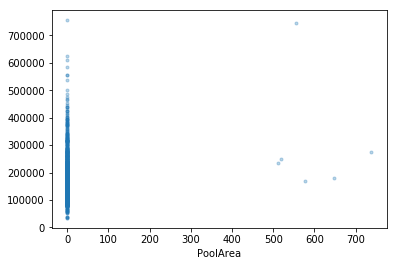

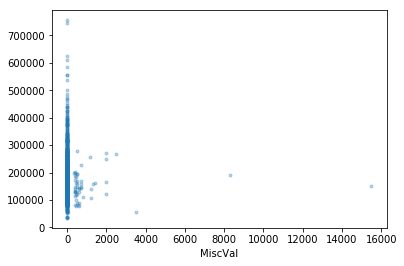

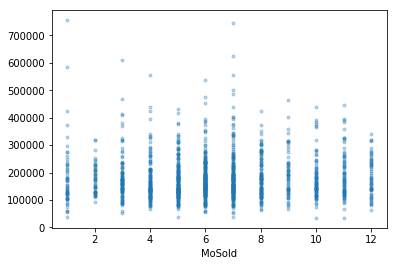

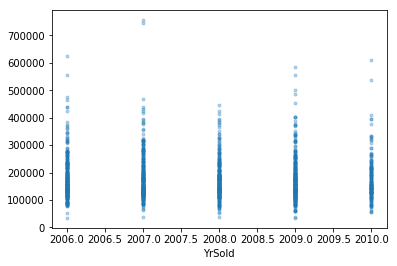

In [48]:
for column in dictInfo.keys():
    if dictInfo[column] == np.int64 and column != 'SalePrice':
        plt.plot(dfTrainData[column], dfTrainData.SalePrice, '.', alpha = 0.3)
        plt.xlabel(column)
        plt.show()

In [41]:
# identify outliers
# this came to our attention when we plotted GrLivArea against the SalePrice
dfTrainData[(dfTrainData['GrLivArea'] > 4000) & (dfTrainData['SalePrice'] < 400000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [45]:
# this will remove some outliers
index_to_drop = dfTrainData[(dfTrainData['GrLivArea'] > 4000) & (dfTrainData['SalePrice'] < 400000)].index
dfTrainData.drop(index_to_drop, inplace=True)

## Graphing sales price against categorical variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

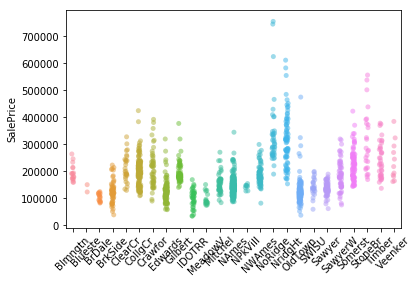

In [50]:
seaborn.stripplot(x=dfTrainData.Neighborhood.values, y=dfTrainData.SalePrice, 
                  order=np.sort(dfTrainData.Neighborhood.unique()), jitter=0.1, alpha=0.5)
plt.xticks(rotation=45)

In [54]:
# sort by average price between neighbourhoods
nghp_mean_price = dfTrainData.groupby('Neighborhood')['SalePrice'].mean()
nghp_mean_price = nghp_mean_price.sort_values()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

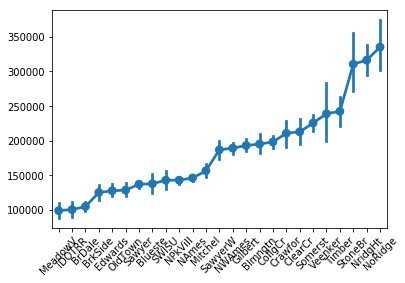

In [58]:
# the graph below shows how prive changes from neighborhood to neighborhood 
seaborn.pointplot(x=dfTrainData.Neighborhood.values, y=dfTrainData.SalePrice.values, 
                  order=nghp_mean_price.index)
plt.xticks(rotation=45)

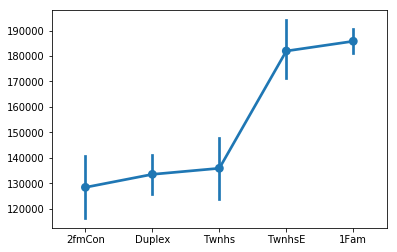

In [76]:
BldgType_mean_price = dfTrainData.groupby('BldgType')['SalePrice'].mean()
BldgType_mean_price = BldgType_mean_price.sort_values()
seaborn.pointplot(x=dfTrainData.BldgType.values, y=dfTrainData.SalePrice.values, order=BldgType_mean_price.index)

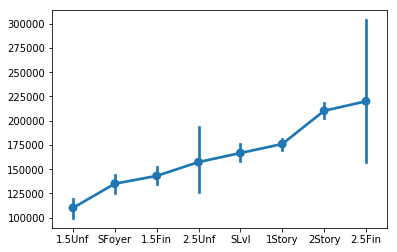

In [77]:
HouseStyle_mean_price = dfTrainData.groupby('HouseStyle')['SalePrice'].mean()
HouseStyle_mean_price = HouseStyle_mean_price.sort_values()
seaborn.pointplot(x=dfTrainData.HouseStyle.values, y=dfTrainData.SalePrice.values, order=HouseStyle_mean_price.index)

In [65]:
HouseStyle_mean_price.index

Index(['1.5Unf', 'SFoyer', '1.5Fin', '2.5Unf', 'SLvl', '1Story', '2Story',
       '2.5Fin'],
      dtype='object', name='HouseStyle')

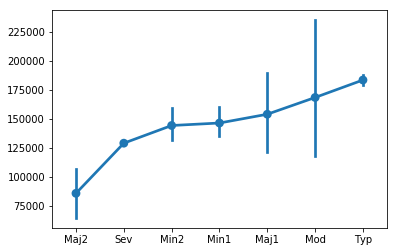

In [66]:
Functional_mean_price = dfTrainData.groupby('Functional')['SalePrice'].mean()
Functional_mean_price = Functional_mean_price.sort_values()
seaborn.pointplot(x=dfTrainData.Functional.values, y=dfTrainData.SalePrice.values, order=Functional_mean_price.index)

In [ ]:
Functional_mean_price = dfTrainData.groupby('Functional')['SalePrice'].mean()
Functional_mean_price = Functional_mean_price.sort_values()
seaborn.pointplot(x=dfTrainData.Functional.values, y=dfTrainData.SalePrice.values, order=Functional_mean_price.index)

In [67]:
categorical_columns = dfTrainData.select_dtypes(include=[object]).columns

C:\Users\arsha\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


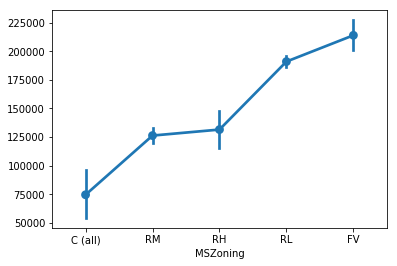

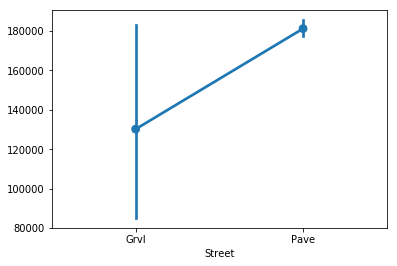

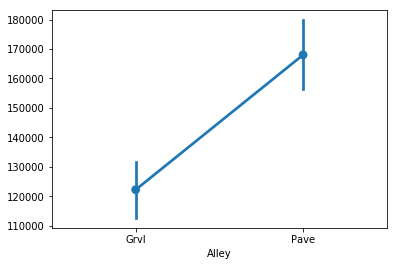

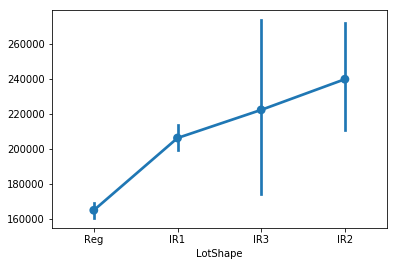

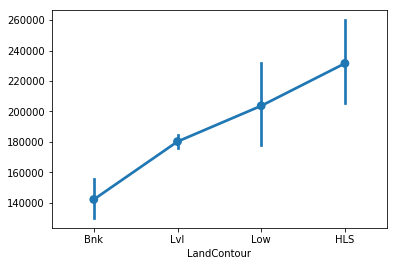

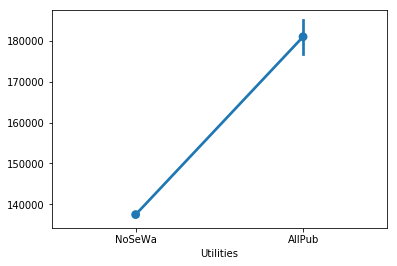

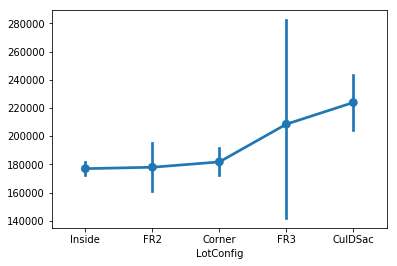

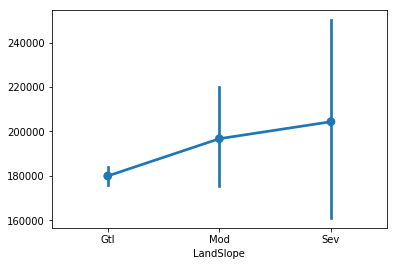

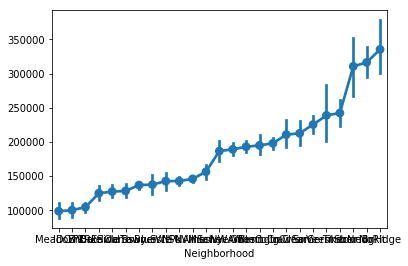

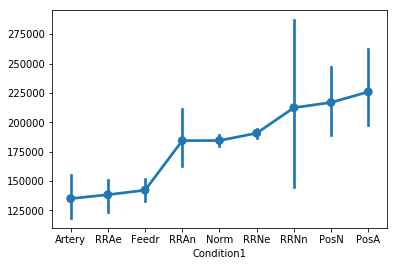

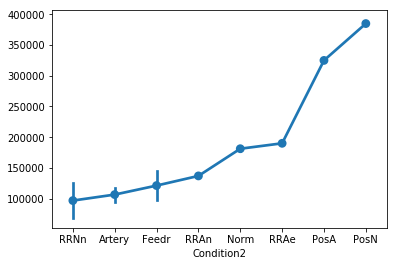

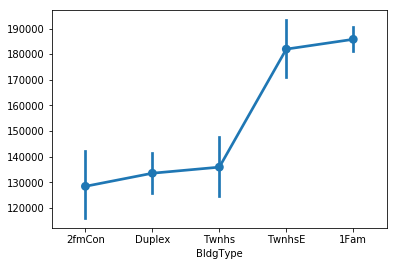

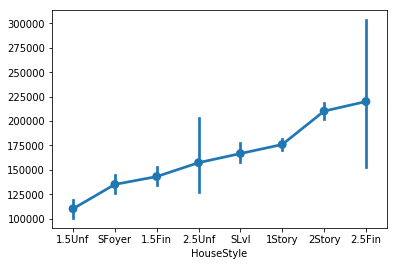

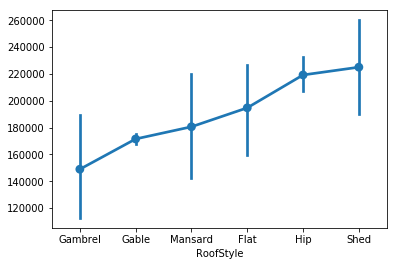

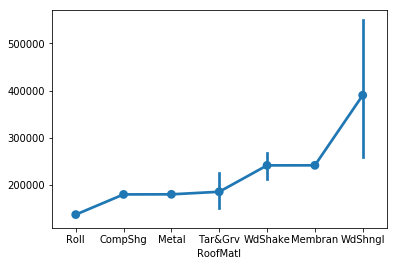

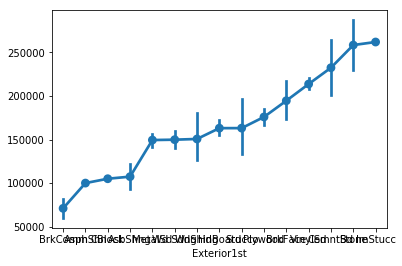

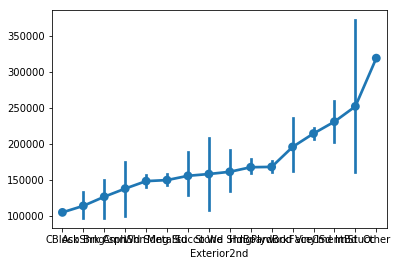

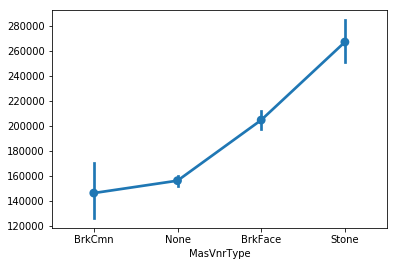

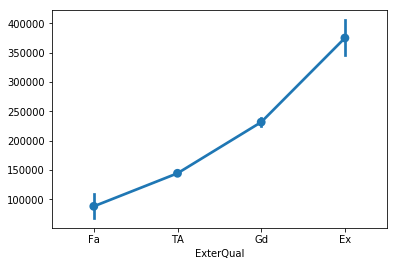

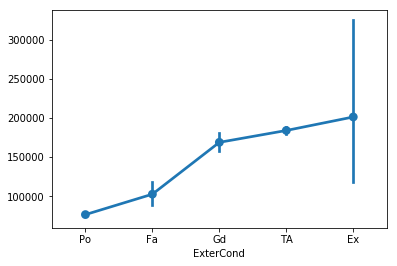

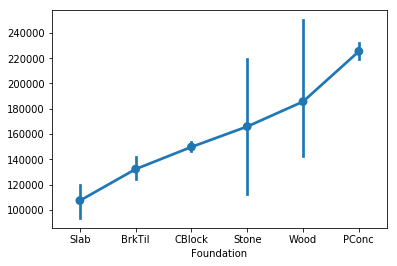

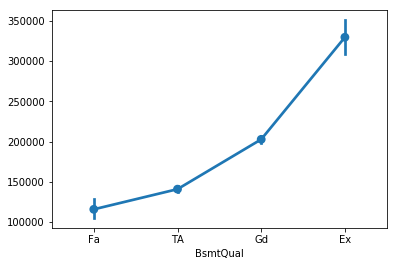

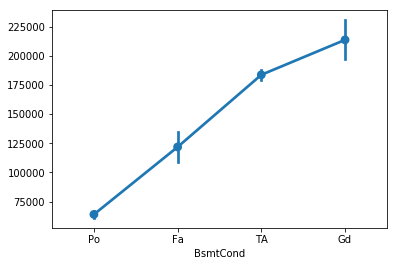

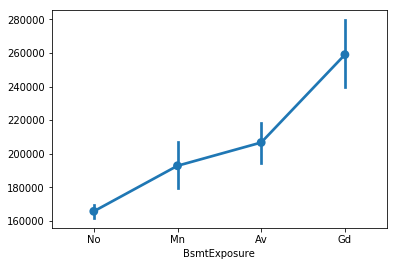

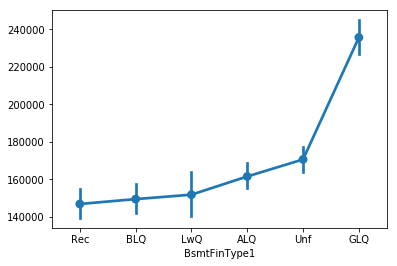

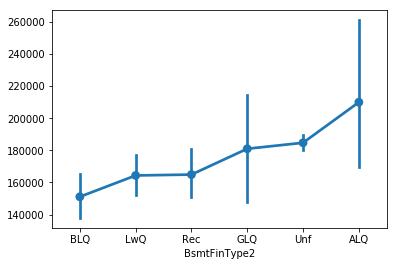

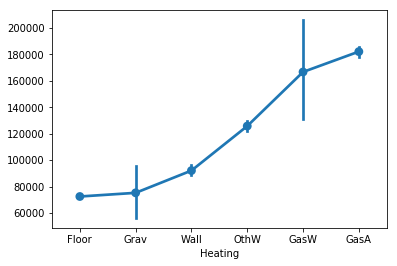

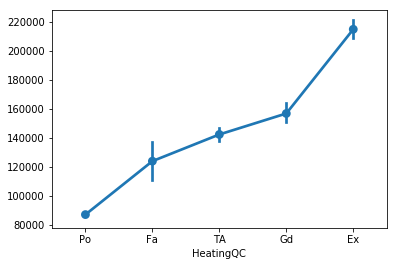

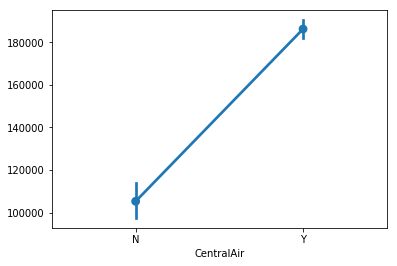

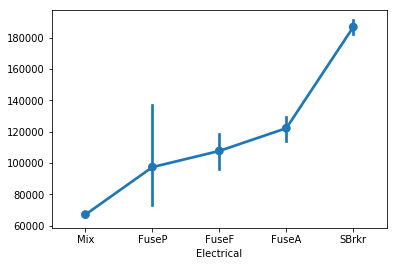

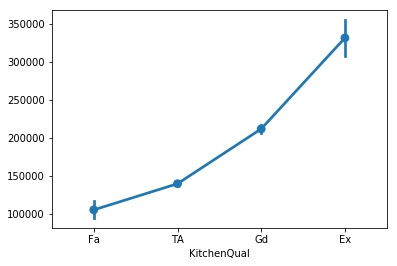

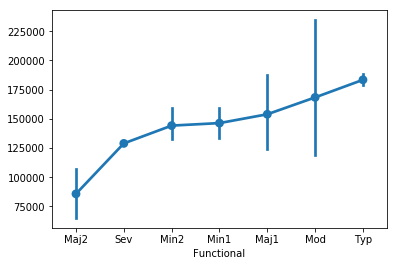

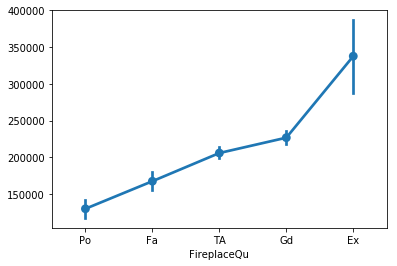

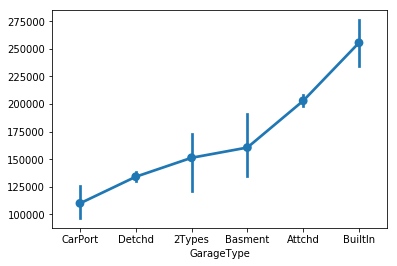

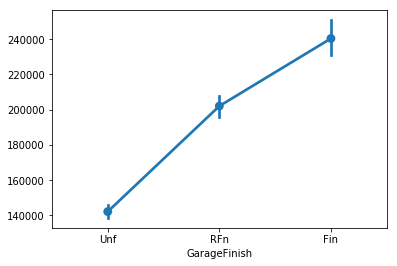

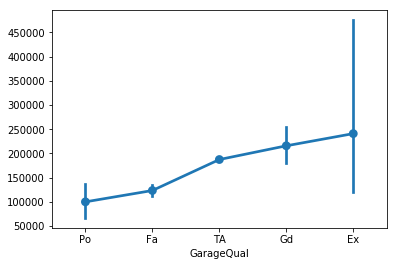

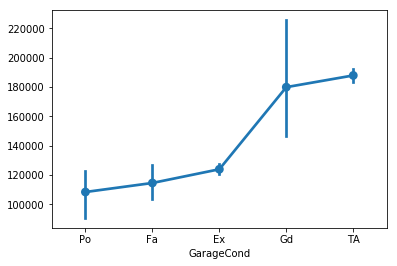

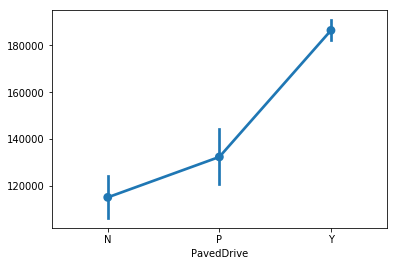

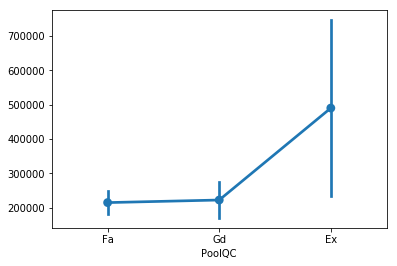

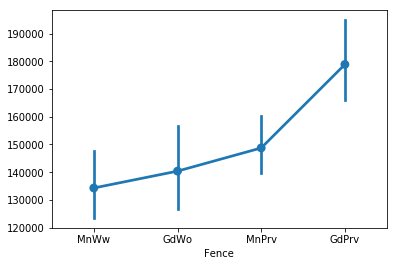

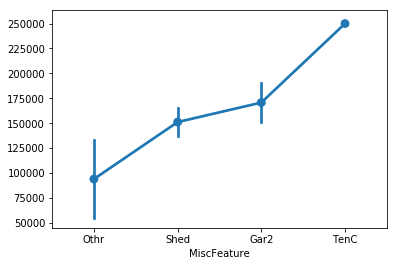

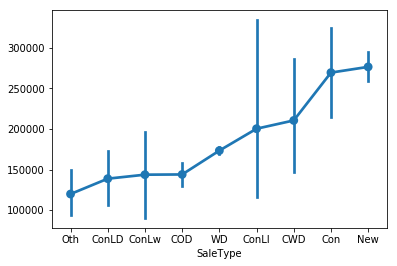

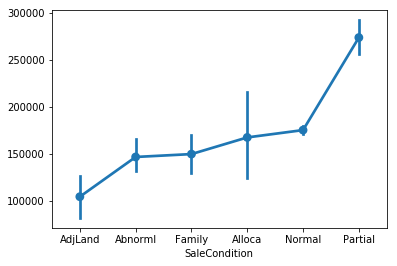

In [74]:
for i, column in enumerate(categorical_columns):
    mean_price = dfTrainData.groupby(column)['SalePrice'].mean()
    mean_price = mean_price.sort_values()
    plt.figure(i)
    seaborn.pointplot(x=dfTrainData[column].values, y=dfTrainData.SalePrice.values, order=mean_price.index)
    plt.xlabel(column)

In [75]:
plt.close()